In [96]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [97]:
# load data
data = pd.read_csv('dataset/dataset.csv',index_col=False) 
data.fillna(0,inplace=True)


In [98]:
data.head(5)

,wu,wr,wd,wl,au,ar,ad,al,bu,br,bd,bl,dx,dy,direction
0,368,208,144,304,1,0,0,0,0,0,1,0,0,-112,0
1,352,208,160,304,1,0,0,0,0,0,1,0,0,-96,0
2,336,208,176,304,1,0,0,0,0,0,1,0,0,-80,0
3,320,208,192,304,1,0,0,0,0,0,1,0,0,-64,0
4,304,208,208,304,1,0,0,0,0,0,1,0,0,-48,0


In [99]:
data = data.reset_index(drop=True)

In [100]:
data.head(5)

,wu,wr,wd,wl,au,ar,ad,al,bu,br,bd,bl,dx,dy,direction
0,368,208,144,304,1,0,0,0,0,0,1,0,0,-112,0
1,352,208,160,304,1,0,0,0,0,0,1,0,0,-96,0
2,336,208,176,304,1,0,0,0,0,0,1,0,0,-80,0
3,320,208,192,304,1,0,0,0,0,0,1,0,0,-64,0
4,304,208,208,304,1,0,0,0,0,0,1,0,0,-48,0


In [101]:
X = data.iloc[:,:-1].astype(int).values # همه ردیف ها تا ستون اخر
Y = data.iloc[: ,-1].astype(int).values # همه ردیف ها فقط ستون اخرشون


In [102]:
X , Y

(array([[ 368,  208,  144, ...,    0,    0, -112],
        [ 352,  208,  160, ...,    0,    0,  -96],
        [ 336,  208,  176, ...,    0,    0,  -80],
        ...,
        [ 224,  240,  288, ...,    0,    0,  272],
        [ 240,  240,  272, ...,    0,    0,  256],
        [ 256,  240,  256, ...,    0,    0,  240]]),
 array([0, 0, 0, ..., 2, 2, 2]))

In [103]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(14 , activation='sigmoid') , 
    tf.keras.layers.Dense(30,activation='relu') , 
    tf.keras.layers.Dense(16,activation='relu') , 
    tf.keras.layers.Dense(4 , activation='softmax')
])

In [104]:
Y_train= Y_train.reshape(-1,1) 

Y_test= Y_test.reshape(-1,1)

In [105]:
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((4488, 14), (4488, 1), (1123, 14), (1123, 1))

In [106]:
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy' , 
              metrics=['accuracy']
)


In [107]:
output = model.fit(X_train,Y_train,epochs=10)

Epoch 1/10


141/141 [==============================] - 7s 4ms/step - loss: 1.1642 - accuracy: 0.5838
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.5254 - accuracy: 0.8451
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1676 - accuracy: 0.9579
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0513 - accuracy: 0.9933
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0175 - accuracy: 0.9989
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9993
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0049 - accuracy: 0.9998
Epoch 8/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 9/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0017 - accuracy: 1.0000


In [108]:
loss , accuracy = model.evaluate(X_test,Y_test)

36/36 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000


In [109]:
model.save('weights/snake_game_model.h5')


c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


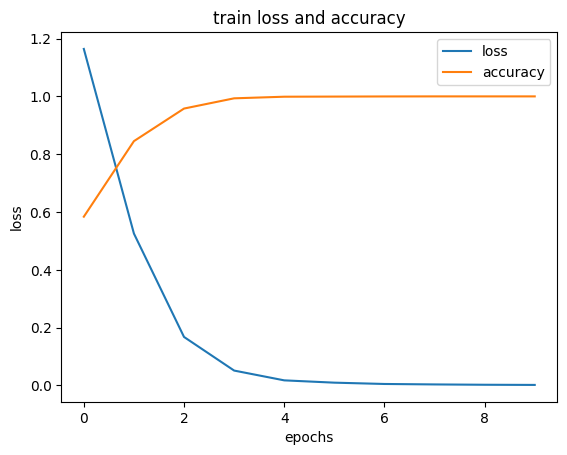

In [110]:

plt.plot(output.history["loss"], label='loss')
plt.plot(output.history["accuracy"], label='accuracy')
plt.title("train loss and accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()